<a href="https://colab.research.google.com/github/MihaKlancnik/na2_RIRSU/blob/main/Nal2_RIRSU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:


import os
import re
from IPython.display import display, Image
import numpy as np
from PIL import Image as PILImage
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [92]:


circles_path = '/content/drive/MyDrive/Colab Notebooks/shapes/circles'
squares_path = '/content/drive/MyDrive/Colab Notebooks/shapes/squares'
triangles_path = '/content/drive/MyDrive/Colab Notebooks/shapes/triangles'


circles_list = []
squares_list = []
triangles_list = []

for filename in os.listdir(circles_path):
  f = os.path.join(circles_path, filename)
  if os.path.isfile(f):
    circles_list.append(f)

for filename in os.listdir(squares_path):
  f = os.path.join(squares_path, filename)
  if os.path.isfile(f):
    squares_list.append(f)


for filename in os.listdir(triangles_path):
  f = os.path.join(triangles_path, filename)
  if os.path.isfile(f):
    triangles_list.append(f)




In [93]:


display(Image(filename=circles_list[0]))
display(Image(filename=squares_list[0]))
display(Image(filename=triangles_list[0]))

In [94]:



flattened_images = []
labels = []

def process_images(image_list, label):
  for image_path in image_list:
    img = PILImage.open(image_path).convert('L')
    img_array = np.array(img).flatten()
    flattened_images.append(img_array)
    labels.append(label)


process_images(circles_list, 'circle')
process_images(squares_list, 'square')
process_images(triangles_list, 'triangle')



In [95]:
#test and train

X_train, X_test, y_train, y_test = train_test_split(flattened_images, labels, test_size=0.3, shuffle=True, random_state=4321)

In [96]:

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=1234)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4


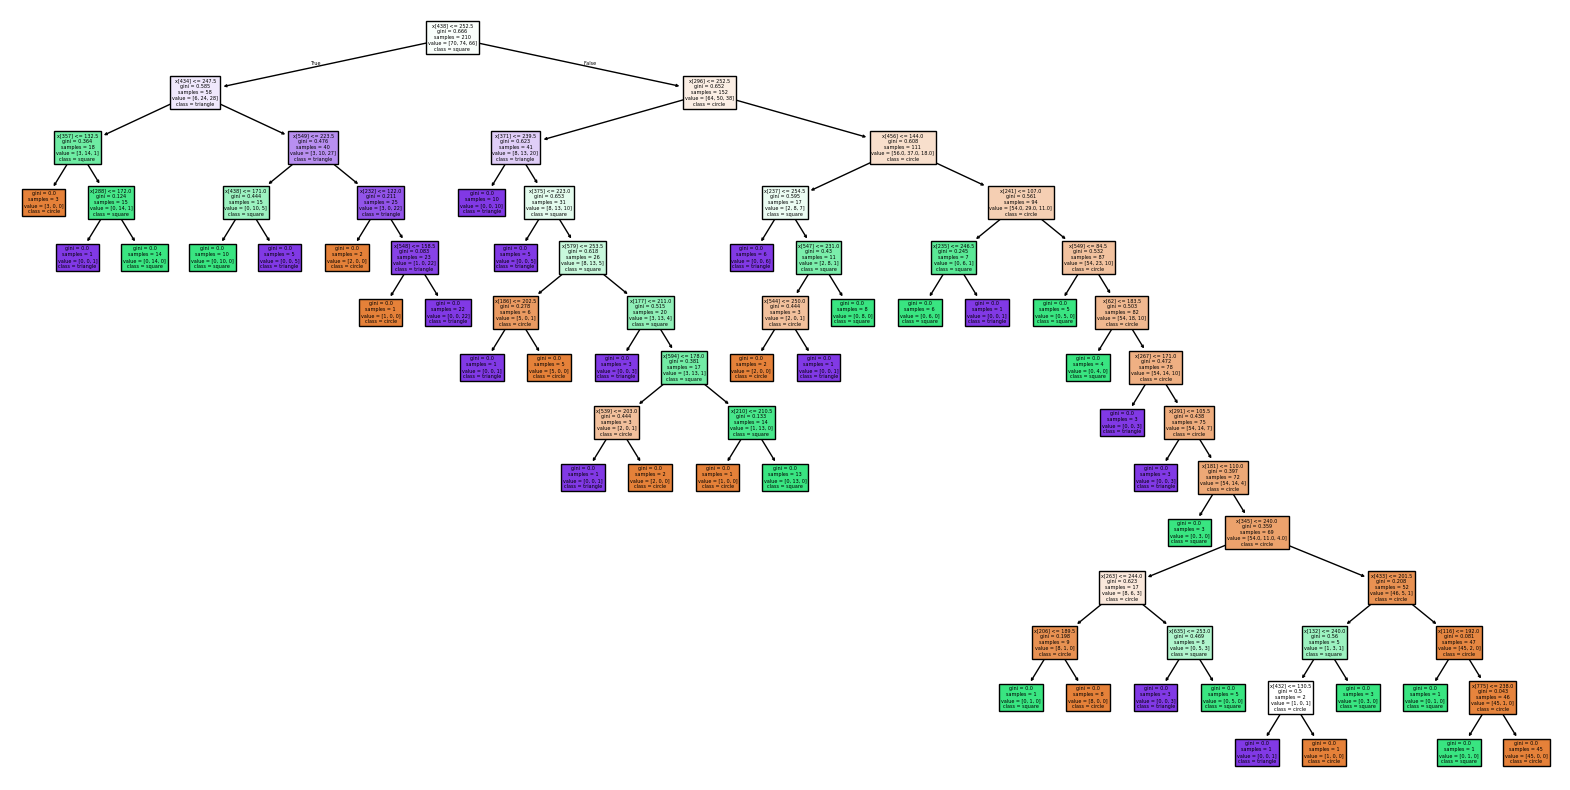

In [97]:


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=None, class_names=['circle', 'square', 'triangle'])
plt.show()

In [98]:


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")
df_results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results_tree)

Precision: 0.4083333333333333
Recall: 0.4
F-score: 0.39798477384684283
      Actual Predicted
0     circle    square
1   triangle    square
2     circle  triangle
3   triangle    square
4   triangle  triangle
..       ...       ...
85  triangle    circle
86  triangle    square
87    square  triangle
88    square    square
89    circle    circle

[90 rows x 2 columns]


In [99]:
# prompt: This works great. now insted of decision tree use k-nearest neightbor



# Create a K-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

Accuracy: 0.4444444444444444
Precision: 0.5883797544174902
Recall: 0.4444444444444444
F-score: 0.4123975163802271


In [100]:

df_results_k = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results_k)

      Actual Predicted
0     circle    square
1   triangle    square
2     circle  triangle
3   triangle    circle
4   triangle    circle
..       ...       ...
85  triangle  triangle
86  triangle    square
87    square    circle
88    square    square
89    circle    square

[90 rows x 2 columns]


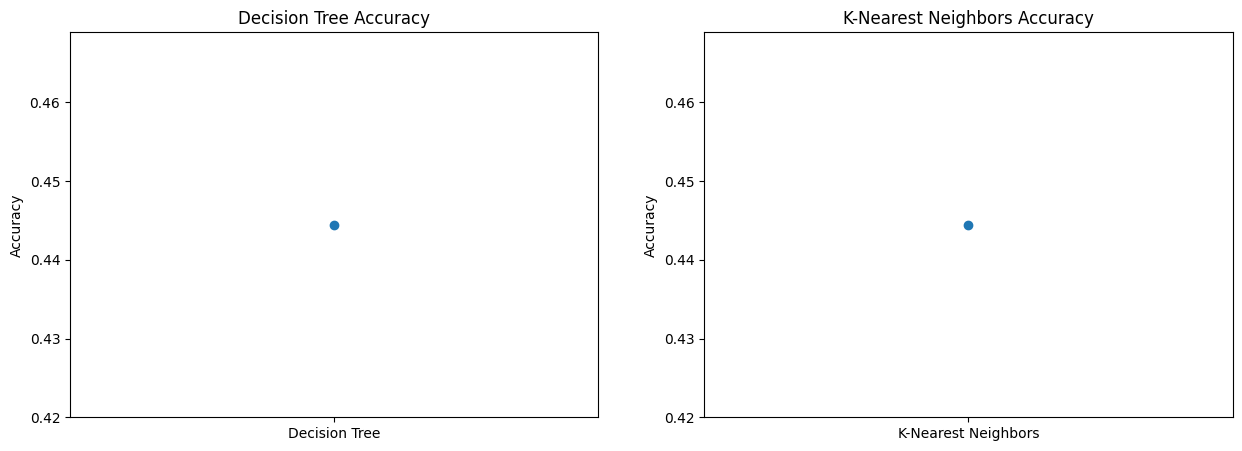

In [102]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Decision Tree accuracy
ax[0].plot(['Decision Tree'], [accuracy_score(y_test, model.predict(X_test))], marker='o')
ax[0].set_title('Decision Tree Accuracy')
ax[0].set_ylabel('Accuracy')

# Plot the KNN accuracy
ax[1].plot(['K-Nearest Neighbors'], [accuracy_score(y_test, model.predict(X_test))], marker='o')
ax[1].set_title('K-Nearest Neighbors Accuracy')
ax[1].set_ylabel('Accuracy')

# Add some labels or annotations if needed

plt.show()